Using bike sharing dataset. The goal is to predict the count of total rental bikes using KNN's regressor and the OLS linear regression implemented in sklearn.


### Import the relevant libraries

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import  r2_score , mean_absolute_error  
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

sns.set()

### Load the dataset and displaying the inputs

In [2]:
with open('Readme.txt', 'r') as f:
    contents = f.read()
print(contents)

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

In [3]:
day_data = pd.read_csv('day.csv')
day_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [4]:
day_data.shape

(731, 16)

In [5]:
day_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
day_modified = pd.read_csv('day.csv').drop(['instant', 
                                    'dteday',  
                                    'yr', 
                                    'mnth', 
                                    'holiday', 
                                    'weekday', 
                                    'weathersit', 
                                    'workingday'], axis = 1)

### Visualize Data

Text(0.5, 1.0, 'Confusion Matrix for Day Data')

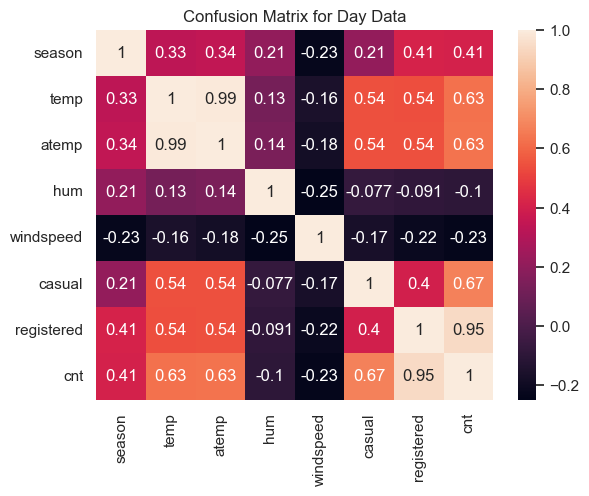

In [7]:
corr_matrix = day_modified.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Confusion Matrix for Day Data')

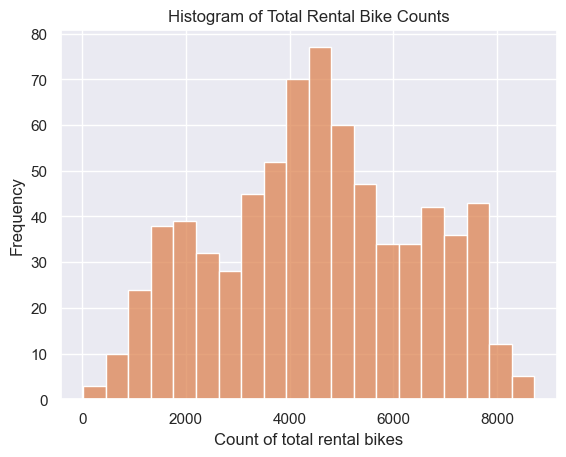

In [8]:
sns.histplot()
sns.histplot(day_modified['cnt'] , bins=20)
plt.xlabel('Count of total rental bikes')
plt.ylabel('Frequency')
plt.title('Histogram of Total Rental Bike Counts')
plt.show()

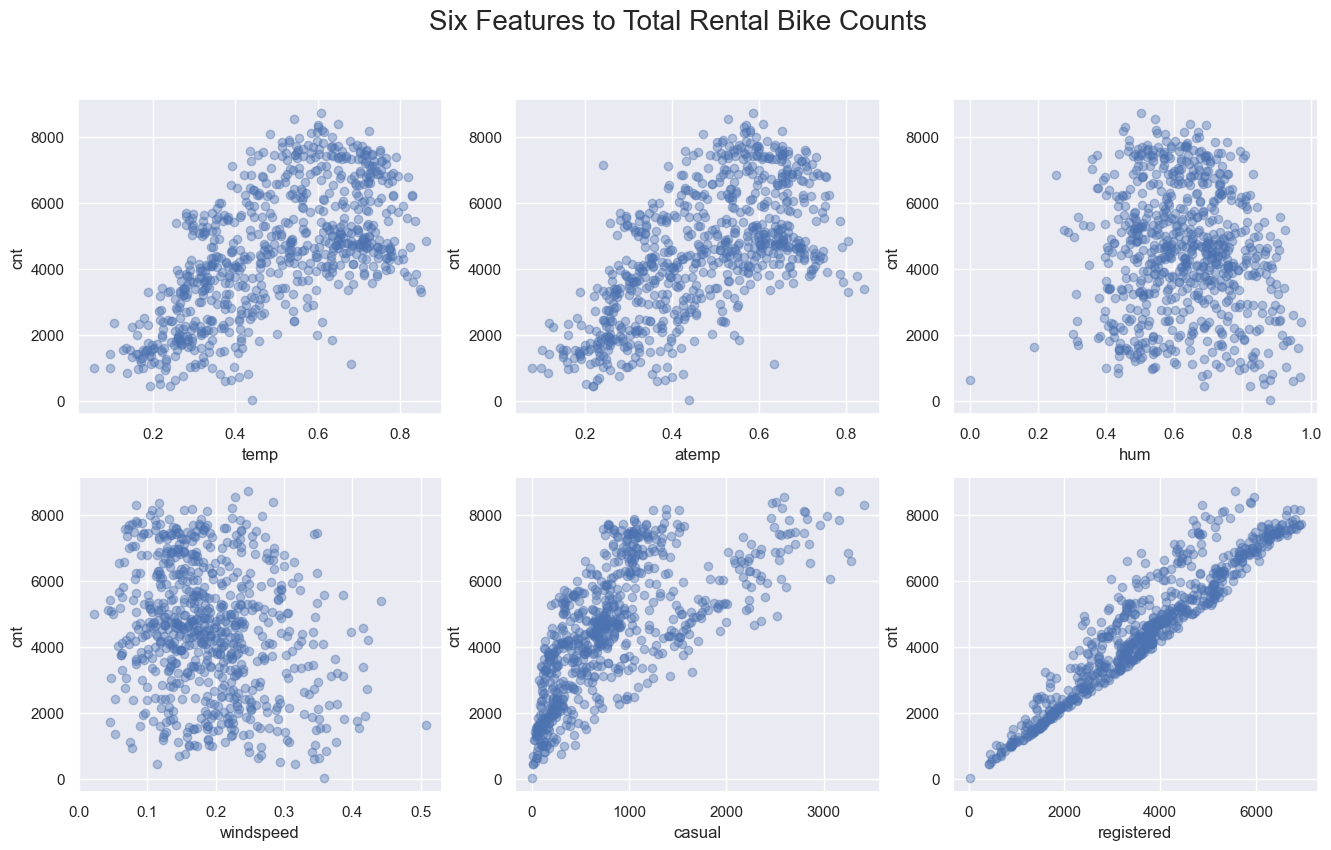

In [9]:
fig, axs = plt.subplots(2, 3, figsize=(16, 9))
axs = axs.ravel()
for i, col in enumerate(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']):
    axs[i].scatter(day_modified[col], day_modified['cnt'], alpha=0.4)
    axs[i].set_xlabel(col , fontsize=12)
    axs[i].set_ylabel('cnt')
plt.ticklabel_format()
plt.suptitle('Six Features to Total Rental Bike Counts' , fontsize = 20)
plt.show()

### Train Test Split - Perform a principal component analysis

Based on the plots - we can see that temp and atemp have a linear relationship with cnt. I will use these 2 featrues as inputs and targets.

Creating 80:20 train-test split with Scaling the features.

In [10]:
inputs = day_modified[['season','casual', 'registered','temp','atemp','hum','windspeed']]
targets = day_modified['cnt']

In [11]:
## we will not use 'startify' as the data is balanced and there are no significant differences between the different
#classes of the target variable
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, 
                                                     test_size=0.2, 
                                                     random_state=365)

### Create an instance of the RandomForestRegressor Model

In [12]:
rf_reg = RandomForestRegressor()

In [14]:
rf_reg.fit(x_train , y_train)

RandomForestRegressor()

In [15]:
parameters = {'n_estimators': [50,100,150,200,300,400], 'max_depth':[5,10,15,20,25] , 'min_samples_leaf': [1,5,10,15]}

In [16]:
grid = GridSearchCV(estimator= RandomForestRegressor() , param_grid= parameters)

In [18]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_leaf': [1, 5, 10, 15],
                         'n_estimators': [50, 100, 150, 200, 300, 400]})

In [19]:
grid.best_params_ , grid.best_score_ #r2 is 

({'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 200},
 0.9958508477751122)

In [20]:
rf = grid.best_score_

In [21]:
grid.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=200)

In [22]:
grid.best_estimator_.feature_importances_

array([3.15428970e-04, 1.01926994e-01, 8.94364832e-01, 6.54684167e-04,
       9.62748699e-04, 7.71377859e-04, 1.00393405e-03])

In [25]:
importances = grid.best_estimator_.feature_importances_

In [26]:
clf = grid.best_estimator_

In [27]:
clf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

In [28]:
rf_y_test_pred = clf.predict(x_test)

### Plot the predicted values from model versus the true values

In [30]:
features =  ['season','temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
feature_importances = pd.Series(importances, index=features)


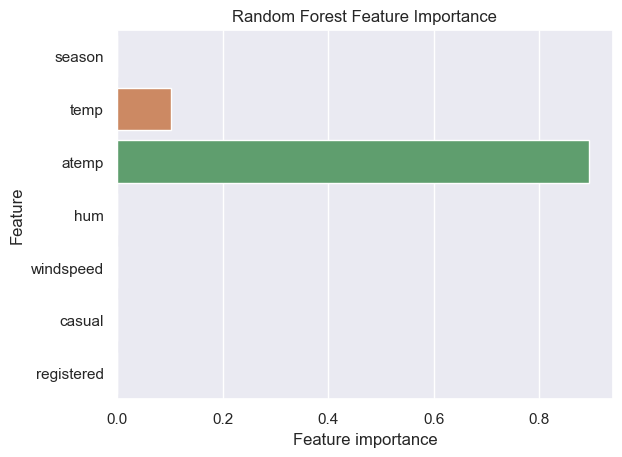

In [31]:
sns.barplot(x=feature_importances, y=features)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance');

### Calculate the R2 & MAE

In [33]:
r2 = r2_score(y_test , rf_y_test_pred)
r2

0.997349997099679

In [35]:
MAE = mean_absolute_error(y_test , rf_y_test_pred)
MAE

66.78726713146591

In [44]:
scores_df = pd.DataFrame({ 'RF Metrics': [r2 , MAE]} , index= ['r2' , 'MAE'])
scores_df

,RF Metrics
r2,0.997350
MAE,66.787267
